In [67]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
import scipy as sp
import math
from datetime import date
from datetime import datetime

In [68]:
data = pd.read_excel('FNCL 5.5.xlsx')
data=data.dropna(axis=0, how='any')
data.head() # sample of dataset

,Date,PX_LAST,PX_MID,FNCL 5.5,Unnamed: 4
1,2017-06-16,3.80,3.80,111.109375,2.27
2,2017-06-09,3.83,3.83,111.296875,2.22
3,2017-06-02,3.76,3.76,111.390625,2.20
4,2017-05-26,3.81,3.81,111.328125,2.22
5,2017-05-19,3.85,3.85,111.359375,2.21


In [69]:
date=data["Date"]
data["DDate"]=pd.to_datetime(date)
data['Year'] = data['DDate'].dt.year
data.head()

,Date,PX_LAST,PX_MID,FNCL 5.5,Unnamed: 4,DDate,Year
1,2017-06-16,3.80,3.80,111.109375,2.27,2017-06-16,2017
2,2017-06-09,3.83,3.83,111.296875,2.22,2017-06-09,2017
3,2017-06-02,3.76,3.76,111.390625,2.20,2017-06-02,2017
4,2017-05-26,3.81,3.81,111.328125,2.22,2017-05-26,2017
5,2017-05-19,3.85,3.85,111.359375,2.21,2017-05-19,2017


In [93]:
def plotPoly(order,data):
    x=data['PX_MID']
    y=data['FNCL 5.5']
    
    # Calculate Coef
    coef = np.polyfit(x, y, order)
    z=0
    for n in np.arange(order,-1,-1):
        z+=coef[n]*x**(order-n)
        
    labels = data['Year']
    df = pd.DataFrame(dict(x=x, y=y, label=labels)).copy()
    groups = df.groupby('label')

    # Plot
    colorlimit=len(data['Year'].unique()) 
    plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
    fig, ax = plt.subplots(figsize=(14, 10))
    colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
    ax.set_color_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='',ms=3, label=name)
    ax.legend(numpoints=1)
    plt.plot(x,z,color='r')
    plt.title('FNCL 5.5 Price vs 10y Treasury')
    plt.xlabel('10y Treasury')
    plt.ylabel('FNCL 5.5 Price')
    plt.show()
    formula='y = '+str(coef[order])
    if order > 1:
        for n in np.arange(order-1,-1,-1):
            formula += (' + ' if coef[n]>0 else ' ') + str(coef[n])+'x^'+str(order-n)+' '
    print(formula)     
    print('R square is ',1-np.sum((z-y)**2)/np.sum((y-np.mean(y))**2))
    print('Squared error is ',np.sum((z-y)**2))

D:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


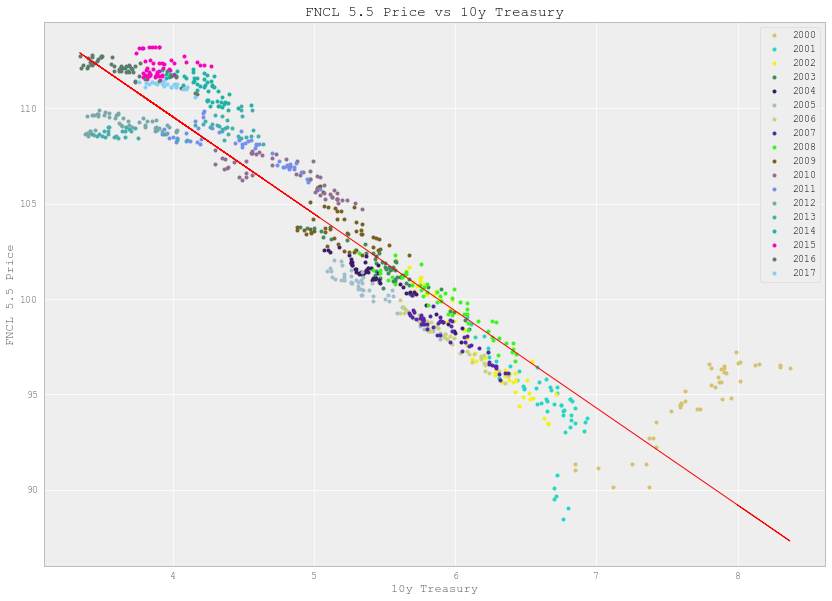

y = 129.921995962
R square is  0.884289400921051
Squared error is  3755.594597457107


In [96]:
plotPoly(1,data)

D:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


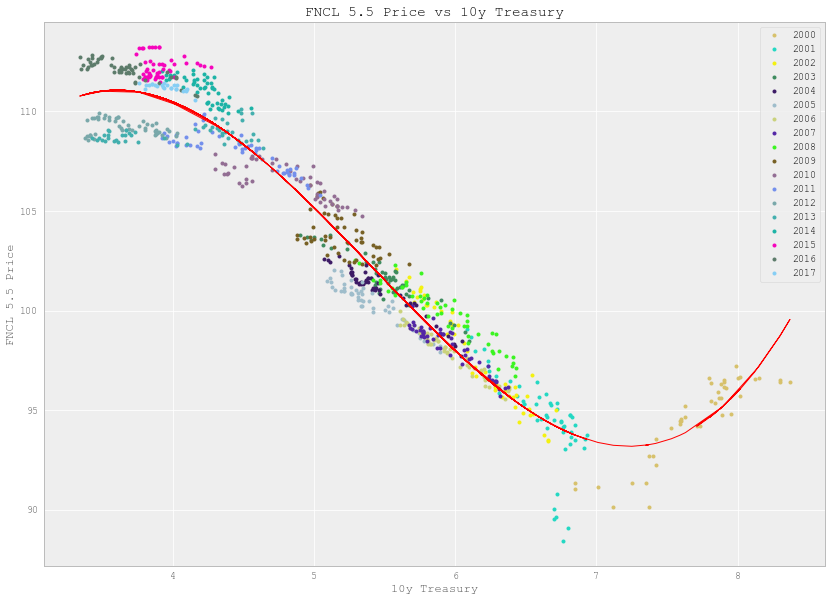

y = 23.0908106699 + 58.5319375418x^1  -12.1651237696x^2  + 0.74831888465x^3 
R square is  0.9509321560489131
Squared error is  1592.5846994002443


In [94]:
plotPoly(3,data)

D:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


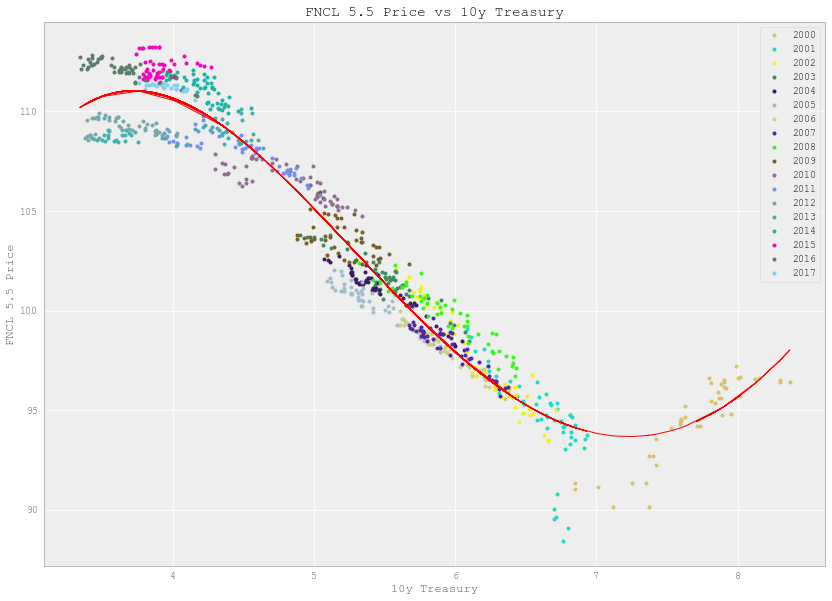

y = -50.5177367589 + 114.908020759x^1  -27.933493568x^2  + 2.65822150009x^3  -0.084561939867x^4 
R square is  0.9519516348297653
Squared error is  1559.4956908559352


In [95]:
plotPoly(4,data)